## Baixa dependências

In [1]:
!pip install pyvis
!pip install nxviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importando dependências

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from nxviz import CircosPlot
from pyvis.network import Network
from IPython.core.display import display, HTML
import numpy as np

/usr/local/lib/python3.10/dist-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


## Upload do dataset

Dataset pode ser encontrado em: https://www.kaggle.com/code/ankur310794/network-analysis-of-hobbies-interests#network-analysis-hobbies-interests-of-young-people

In [3]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('responses.csv')

Saving responses.csv to responses.csv


É filtrado somente as colunas de filmes e músicas

In [4]:
movies = ["Horror", 
          "Thriller", 
          "Comedy",
          "Romantic",
          "Sci-fi", 
          "War",
          "Fantasy/Fairy tales", 
          "Animated", 
          "Documentary", 
          "Western", 
          "Action"]

music = ["Dance", 
         "Folk",
         "Country", 
         "Classical music",
         "Pop", 
         "Rock", 
         "Metal or Hardrock", 
         "Punk", 
         "Hiphop, Rap", 
         "Reggae, Ska", 
         "Swing, Jazz", 
         "Rock n roll", 
         "Alternative", 
         "Latino", 
         "Techno, Trance",
         "Opera"]

filtered_df = df.loc[:, movies + music]
filtered_df.columns

Index(['Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',
       'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action',
       'Dance', 'Folk', 'Country', 'Classical music', 'Pop', 'Rock',
       'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska',
       'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance',
       'Opera'],
      dtype='object')

É considerado que alguém gosta de dois gêneros ao mesmo tempo se a nota dada para ambos os gêneros for maior ou igual a 3.
Não foi calculado a relação entre dois gêneros do mesmo tipo. Por exemplo, não foi calculado a relação entre Horror e Thriller, 
pois ambos são do tipo filme.
Dessa forma, o grafo resultante é um grafo bipartido. O que fica evidenciado na matriz de adjacência.

In [5]:
relations = {}

for m in music:
    for mov in movies:
        count = ((filtered_df[m] >= 3) & (filtered_df[mov] >= 3)).sum()
        key = f"{m}&{mov}"
        relations[key] = count

max_count = max(relations.values())
normalized_relations = {key: round(count / max_count, 2) for key, count in relations.items()}
print(normalized_relations)

{'Dance&Horror': 0.48, 'Dance&Thriller': 0.65, 'Dance&Comedy': 0.83, 'Dance&Romantic': 0.68, 'Dance&Sci-fi': 0.56, 'Dance&War': 0.55, 'Dance&Fantasy/Fairy tales': 0.72, 'Dance&Animated': 0.72, 'Dance&Documentary': 0.7, 'Dance&Western': 0.26, 'Dance&Action': 0.68, 'Folk&Horror': 0.23, 'Folk&Thriller': 0.34, 'Folk&Comedy': 0.45, 'Folk&Romantic': 0.37, 'Folk&Sci-fi': 0.31, 'Folk&War': 0.32, 'Folk&Fantasy/Fairy tales': 0.42, 'Folk&Animated': 0.4, 'Folk&Documentary': 0.42, 'Folk&Western': 0.2, 'Folk&Action': 0.36, 'Country&Horror': 0.22, 'Country&Thriller': 0.29, 'Country&Comedy': 0.38, 'Country&Romantic': 0.31, 'Country&Sci-fi': 0.27, 'Country&War': 0.28, 'Country&Fantasy/Fairy tales': 0.34, 'Country&Animated': 0.32, 'Country&Documentary': 0.34, 'Country&Western': 0.19, 'Country&Action': 0.3, 'Classical music&Horror': 0.39, 'Classical music&Thriller': 0.57, 'Classical music&Comedy': 0.73, 'Classical music&Romantic': 0.59, 'Classical music&Sci-fi': 0.51, 'Classical music&War': 0.54, 'Classi

É criado um nó para cada coluna e as relações são usadas para adicionar as arestas no grafo.

In [22]:
G = nx.Graph()

G.add_nodes_from(movies, ntype='movies')
G.add_nodes_from(music, ntype='music')

for key, weight in normalized_relations.items():
    if weight > 0.7:
        music_genre, movie_genre = key.split('&')
        G.add_edge(music_genre, movie_genre, weight=weight)

**Matriz de adjacência**

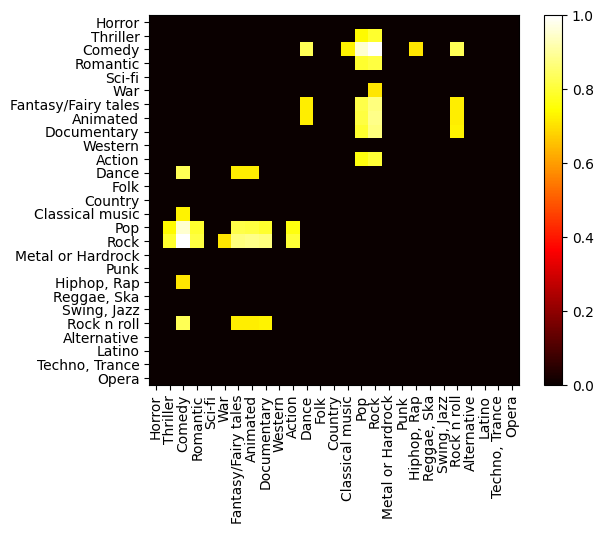

In [23]:
adj_matrix = nx.adjacency_matrix(G)
adj_df = pd.DataFrame(adj_matrix.toarray(), index=G.nodes(), columns=G.nodes())

plt.imshow(adj_df, cmap='hot', interpolation='nearest')
plt.xticks(range(len(adj_df.columns)), adj_df.columns, rotation='vertical')
plt.yticks(range(len(adj_df.index)), adj_df.index)
plt.colorbar()
plt.show()


**Diâmetro da rede**

In [24]:
if nx.is_connected(G):
    diameter = nx.diameter(G)
    print("Diâmetro da rede:", diameter)
else:
    print("A rede não é totalmente conectada. Não é possível o cálculo do diâmetro")

A rede não é totalmente conectada. Não é possível o cálculo do diâmetro


**Periferia da rede**

In [9]:
if nx.is_connected(G):
    peripheral_nodes = nx.periphery(G)
    print("Nós periféricos da rede:", peripheral_nodes)
else:
    print("A rede não é totalmente conectada. Não achar a periferia")

Nós periféricos da rede: ['Western', 'Folk', 'Country', 'Metal or Hardrock', 'Techno, Trance', 'Opera']


**Histograma de distribuição empírica de gra**

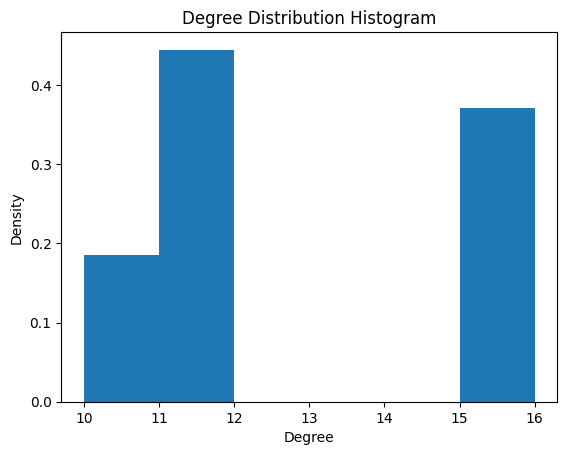

In [10]:
degree_sequence = [degree for _, degree in G.degree()]
plt.hist(degree_sequence, bins='auto', density=True)
plt.xlabel('Degree')
plt.ylabel('Density')
plt.title('Degree Distribution Histogram')
plt.show()

**Coeﬁciente de clustering local para nós escolhidos.**

In [11]:
selected_nodes = ["Rock", "Opera"] 

for node in selected_nodes:
    clustering_coefficient = nx.clustering(G, node)
    print(f"Coeficiente de clustering local para o nó {node}: {clustering_coefficient}")

Coeficiente de clustering local para o nó Rock: 0
Coeficiente de clustering local para o nó Opera: 0


**Coeﬁciente de clustering global**

In [12]:
clustering_coefficient = nx.average_clustering(G)

print(f"Coeficiente de clustering global: {clustering_coefficient}")

Coeficiente de clustering global: 0.0


**Componentes conectados**

In [13]:
connected_components = list(nx.connected_components(G))

for component in connected_components:
    print(component)

{'Latino', 'Hiphop, Rap', 'Swing, Jazz', 'Metal or Hardrock', 'Action', 'Classical music', 'Thriller', 'Rock n roll', 'Punk', 'Rock', 'Sci-fi', 'Opera', 'Comedy', 'Animated', 'Dance', 'War', 'Documentary', 'Western', 'Horror', 'Country', 'Romantic', 'Pop', 'Alternative', 'Techno, Trance', 'Reggae, Ska', 'Folk', 'Fantasy/Fairy tales'}


**Eigenvector centrality**

In [14]:
eigenvector_centrality = nx.eigenvector_centrality(G)

for node, centrality in eigenvector_centrality.items():
    print(f"{node} = {centrality}")

Horror = 0.2182948569199181
Thriller = 0.2182948569199181
Comedy = 0.2182948569199181
Romantic = 0.2182948569199181
Sci-fi = 0.2182948569199181
War = 0.2182948569199181
Fantasy/Fairy tales = 0.2182948569199181
Animated = 0.2182948569199181
Documentary = 0.2182948569199181
Western = 0.1532179744777802
Action = 0.2182948569199181
Dance = 0.1803883602383976
Folk = 0.16855755166445324
Country = 0.16855755166445324
Classical music = 0.1803883602383976
Pop = 0.1803883602383976
Rock = 0.1803883602383976
Metal or Hardrock = 0.16855755166445324
Punk = 0.1803883602383976
Hiphop, Rap = 0.1803883602383976
Reggae, Ska = 0.1803883602383976
Swing, Jazz = 0.1803883602383976
Rock n roll = 0.1803883602383976
Alternative = 0.1803883602383976
Latino = 0.1803883602383976
Techno, Trance = 0.16855755166445324
Opera = 0.16855755166445324


**Degree centrality**

In [15]:
degree_centrality = nx.degree_centrality(G)
for node, centrality in degree_centrality.items():
    print(f"{node} = {centrality}")

Horror = 0.6153846153846154
Thriller = 0.6153846153846154
Comedy = 0.6153846153846154
Romantic = 0.6153846153846154
Sci-fi = 0.6153846153846154
War = 0.6153846153846154
Fantasy/Fairy tales = 0.6153846153846154
Animated = 0.6153846153846154
Documentary = 0.6153846153846154
Western = 0.42307692307692313
Action = 0.6153846153846154
Dance = 0.42307692307692313
Folk = 0.38461538461538464
Country = 0.38461538461538464
Classical music = 0.42307692307692313
Pop = 0.42307692307692313
Rock = 0.42307692307692313
Metal or Hardrock = 0.38461538461538464
Punk = 0.42307692307692313
Hiphop, Rap = 0.42307692307692313
Reggae, Ska = 0.42307692307692313
Swing, Jazz = 0.42307692307692313
Rock n roll = 0.42307692307692313
Alternative = 0.42307692307692313
Latino = 0.42307692307692313
Techno, Trance = 0.38461538461538464
Opera = 0.38461538461538464


**Closeness centrality.**

In [16]:
closeness_centrality = nx.closeness_centrality(G)
for node, centrality in closeness_centrality.items():
    print(f" {node} = {centrality}")

 Horror = 0.7222222222222222
 Thriller = 0.7222222222222222
 Comedy = 0.7222222222222222
 Romantic = 0.7222222222222222
 Sci-fi = 0.7222222222222222
 War = 0.7222222222222222
 Fantasy/Fairy tales = 0.7222222222222222
 Animated = 0.7222222222222222
 Documentary = 0.7222222222222222
 Western = 0.5652173913043478
 Action = 0.7222222222222222
 Dance = 0.6341463414634146
 Folk = 0.6046511627906976
 Country = 0.6046511627906976
 Classical music = 0.6341463414634146
 Pop = 0.6341463414634146
 Rock = 0.6341463414634146
 Metal or Hardrock = 0.6046511627906976
 Punk = 0.6341463414634146
 Hiphop, Rap = 0.6341463414634146
 Reggae, Ska = 0.6341463414634146
 Swing, Jazz = 0.6341463414634146
 Rock n roll = 0.6341463414634146
 Alternative = 0.6341463414634146
 Latino = 0.6341463414634146
 Techno, Trance = 0.6046511627906976
 Opera = 0.6046511627906976


**Betweness centrality**

In [17]:
betweenness_centrality = nx.betweenness_centrality(G)

for node, centrality in betweenness_centrality.items():
    print(f"{node} = {centrality}")

Horror = 0.03692307692307694
Thriller = 0.03692307692307694
Comedy = 0.03692307692307694
Romantic = 0.03692307692307694
Sci-fi = 0.03692307692307694
War = 0.03692307692307694
Fantasy/Fairy tales = 0.03692307692307694
Animated = 0.03692307692307694
Documentary = 0.03692307692307694
Western = 0.01538461538461539
Action = 0.03692307692307694
Dance = 0.012849650349650354
Folk = 0.008653846153846154
Country = 0.008653846153846154
Classical music = 0.012849650349650354
Pop = 0.012849650349650354
Rock = 0.012849650349650354
Metal or Hardrock = 0.008653846153846154
Punk = 0.012849650349650354
Hiphop, Rap = 0.012849650349650354
Reggae, Ska = 0.012849650349650354
Swing, Jazz = 0.012849650349650354
Rock n roll = 0.012849650349650354
Alternative = 0.012849650349650354
Latino = 0.012849650349650354
Techno, Trance = 0.008653846153846154
Opera = 0.008653846153846154


**Assortatividade geral da rede.**

In [18]:
assortativity = nx.degree_assortativity_coefficient(G)

print(f"Overall Assortativity = {assortativity}")

Overall Assortativity = -0.8916849015317251


/usr/local/lib/python3.10/dist-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


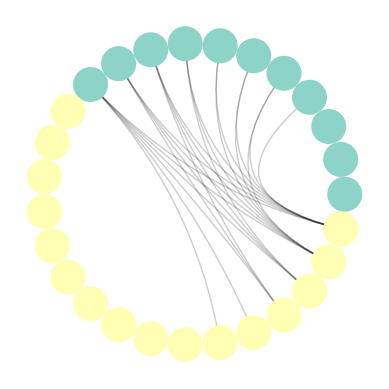

In [25]:
for n, d in G.nodes(data=True):
    G.nodes[n]['degree'] = G.degree(n)

c = CircosPlot(G, node_order='degree', node_color='ntype', node_grouping='ntype')
plt.show()

Usando o grafo circular podemos visualizar de forma parecida e plotar a legenda de cada nó.

{'Horror': Text(1.0, 3.311369150076431e-09, 'Horror'),
 'Thriller': Text(0.9730448723174075, 0.23061587218946566, 'Thriller'),
 'Comedy': Text(0.8936326505074494, 0.44879919565949283, 'Comedy'),
 'Romantic': Text(0.7660444381758019, 0.6427875782349198, 'Romantic'),
 'Sci-fi': Text(0.5971585517163593, 0.8021231912877951, 'Sci-fi'),
 'War': Text(0.3960797496188684, 0.9182161114469799, 'War'),
 'Fantasy/Fairy tales': Text(0.1736482243070401, 0.9848077318095404, 'Fantasy/Fairy'),
 'Animated': Text(-0.05814482140274741, 0.998308183834402, 'Animated'),
 'Documentary': Text(-0.2868032439465284, 0.9579895159958268, 'Documentary'),
 'Western': Text(-0.5000000577419995, 0.8660253904767848, 'Western'),
 'Action': Text(-0.6862417438548781, 0.7273736024142468, 'Action'),
 'Dance': Text(-0.8354877210712834, 0.5495091106955677, 'Dance'),
 'Folk': Text(-0.9396926140540682, 0.3420202164906344, 'Folk'),
 'Country': Text(-0.9932383274122597, 0.11609296072345687, 'Country'),
 'Classical music': Text(-0.99

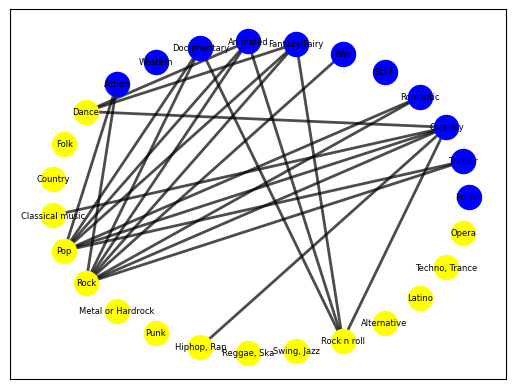

In [27]:
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=movies, node_color='blue', label=None)
nx.draw_networkx_nodes(G, pos, nodelist=music, node_color='yellow', label=None)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.7)
labels = {node: node.split(' ')[0] if node in movies else node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=6)

## Visualizando o grafo com Pyviz

In [39]:
nt = Network('1000px', '1000px', notebook=True,  cdn_resources='in_line', bgcolor="#222222", font_color="white")

for node, attributes in G.nodes(data=True):
    nt.add_node(node, label=node)

for node1, node2, attributes in G.edges(data=True):
    nt.add_edge(node1, node2, weight=attributes['weight'])

nt.barnes_hut()
nt.show("network.html")
display(HTML('network.html'))

network.html
